# PCA

data --> covariance matrix --> eigan val and eigan vectors -->  transform

lda, gda, mnist dataset

In [67]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [68]:
#create some data
mean = np.array([0.0, 0.0])
cov =  np.array([[1.0, 1.2], [1.2, 1.5]])
data = np.random.multivariate_normal(mean, cov, 800)
data.shape

(800, 2)

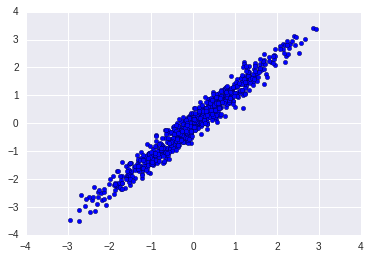

In [69]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [70]:
#pca function
def pca(X, k=None):
    if k is None:
        k = X.shape[0]
    
    A = np.cov(X.T)
    
    eig_val, eig_vec = np.linalg.eig(A)
    
    return eig_val, eig_vec

In [71]:
lam, W = pca(data)
lam, W

(array([ 0.02457782,  2.64981988]), array([[-0.77409628, -0.63306789],
        [ 0.63306789, -0.77409628]]))

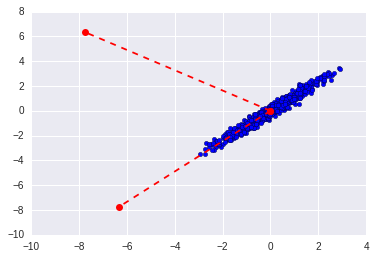

In [72]:
plt.figure(0)
sns.plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [81]:
Z = data.dot(W)
Z.shape

(800, 2)

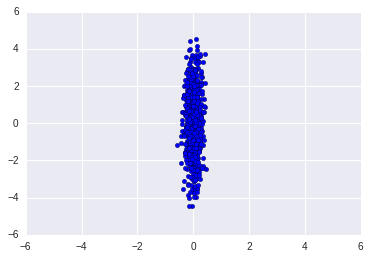

In [82]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

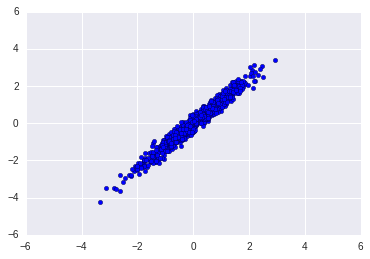

In [9]:
#reconstrcting original data
D = Z.dot(W.T)
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(D[:, 0], D[:, 1])
plt.show()

# PCA on MNIST

In [10]:
ds = pd.read_csv('./mnist-in-csv/mnist_train.csv')

In [11]:
ds.shape

(60000, 785)

In [12]:
data = ds.values[:10000, 1:]
y = ds.values[:10000, 0]
print data.shape

(10000, 784)


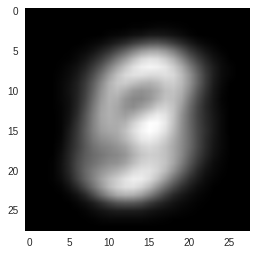

In [13]:
N = 632
plt.figure(0)
plt.grid('off')
plt.imshow(data[:].mean(axis=0).astype(np.uint8).reshape((28, 28)), cmap='gray')

In [14]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [15]:
eig_val, eig_vec = np.linalg.eig(A)

In [16]:
info = []

for ix in range(eig_val.shape[0]):
    dx = [eig_val[ix], eig_vec[ix]]
    info.append(dx)
print len(info)

784


In [17]:
info = sorted(info, key= lambda x:x[0], reverse=True)

In [18]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])
    
sorted_lambda = np.array(sorted_lambda)
sorted_W = np.array(sorted_W)

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


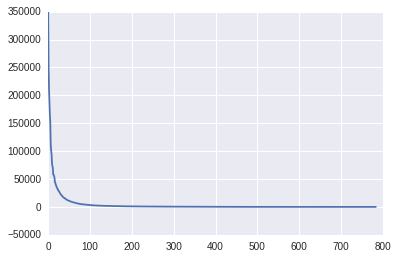

In [19]:
plt.plot(sorted_lambda)

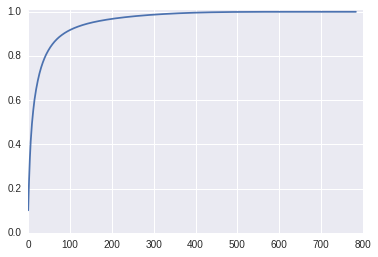

In [20]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [21]:
explained_variance_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())
explained_variance_ratio[2]

(0.23526221593986274+0j)

In [22]:
k = 2
W = sorted_W[:, :k]
W.shape

(784, 2)

In [23]:
Z = data.dot(W)
Z.shape

(10000, 2)

(10000, 784)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


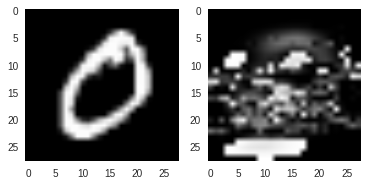

In [24]:
X_reconstruct = Z.dot(W.T).astype(np.uint8)
X_pos = (X_reconstruct>0)
X_new = X_reconstruct * X_pos

print X_reconstruct.shape

# print np.asarray(X_reconstruct[0], dtype='uint8')
N = 1

plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].astype(np.uint8).reshape((28, 28)), cmap='gray')
plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(X_new[N].astype(np.uint8).reshape((28, 28)), cmap='gray')

# Using Sklearn library

In [25]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=151)
X = pca.fit_transform(data)

In [59]:
X.shape

(10000, 151)

In [60]:
X_re = pca.inverse_transform(X)
X_re.shape

(10000, 784)

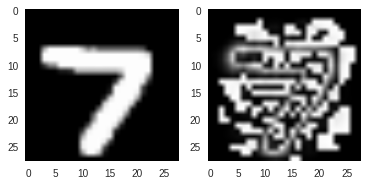

In [61]:
N = np.random.randint(0, high=10000)

plt.figure(0)


plt.subplot(1, 2, 1)
plt.grid('off')
plt.imshow(data[N].reshape((28, 28)), cmap='gray')


plt.subplot(1, 2, 2)
plt.grid('off')
plt.imshow(X_re[N].astype(np.uint8).reshape((28, 28)), cmap='gray')

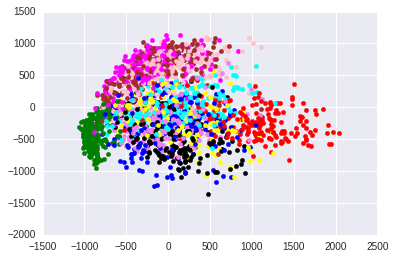

In [53]:
colors = ['red', 'green', 'blue', 'black', 'pink', 'yellow', 'cyan', 'magenta', 'violet', 'brown', 'orange']
plt.figure(0)
for ix in range(2000):
    plt.scatter(X[ix, 0], X[ix, 1], color=colors[y[ix]])
plt.show()